# Amazon graph

This notebook extracts the graph from the Amazon product ratings.
We make use of the files:

- `ratings_Books.csv`
- `ratings_Clothing_Shoes_and_Jewelry.csv`
- `ratings_Sports_and_Outdoors.csv`
- `ratings_Electronics.csv`
- `ratings_CDs_and_Vinyl.csv`
- `ratings_Apps_for_Android.csv`
- `ratings_Beauty.csv`
- `ratings_Cell_Phones_and_Accessories.csv`
- `ratings_Health_and_Personal_Care.csv`
- `ratings_Home_and_Kitchen.csv`
- `ratings_Movies_and_TV.csv`
- `ratings_Office_Products.csv`
- `ratings_Tools_and_Home_Improvement.csv`
- `ratings_Toys_and_Games.csv`
- `ratings_Video_Games.csv`

available at <http://jmcauley.ucsd.edu/data/amazon/>.

In [1]:
import collabclass
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
%%time
with open("../_data/amazon/categories-final.pkl", "rb") as f:
    cats = pickle.load(f)

CPU times: user 2.02 s, sys: 450 ms, total: 2.47 s
Wall time: 2.49 s


In [3]:
%%time
user_cnt = 0
item_cnt = 0

user2idx = dict()
item2idx = dict()

edges = list()

for fname in glob.glob("../_data/amazon/ratings/ratings_*.csv"):
    print(f"processing '{fname}'")
    with open(fname) as f:
        for line in f:
            uid, asin, _, _ = line.strip().split(",")
            if asin not in cats:
                # Ignore items to which we have not assigned a category.
                continue
            if uid not in user2idx:
                user2idx[uid] = user_cnt
                user_cnt += 1
            if asin not in item2idx:
                item2idx[asin] = item_cnt
                item_cnt += 1
            edges.append((user2idx[uid], item2idx[asin]))

processing '../_data/amazon/ratings/ratings_Movies_and_TV.csv'
processing '../_data/amazon/ratings/ratings_Toys_and_Games.csv'
processing '../_data/amazon/ratings/ratings_Clothing_Shoes_and_Jewelry.csv'
processing '../_data/amazon/ratings/ratings_Beauty.csv'
processing '../_data/amazon/ratings/ratings_Books.csv'
processing '../_data/amazon/ratings/ratings_CDs_and_Vinyl.csv'
processing '../_data/amazon/ratings/ratings_Office_Products.csv'
processing '../_data/amazon/ratings/ratings_Electronics.csv'
processing '../_data/amazon/ratings/ratings_Health_and_Personal_Care.csv'
processing '../_data/amazon/ratings/ratings_Apps_for_Android.csv'
processing '../_data/amazon/ratings/ratings_Home_and_Kitchen.csv'
processing '../_data/amazon/ratings/ratings_Sports_and_Outdoors.csv'
processing '../_data/amazon/ratings/ratings_Cell_Phones_and_Accessories.csv'
processing '../_data/amazon/ratings/ratings_Video_Games.csv'
processing '../_data/amazon/ratings/ratings_Tools_and_Home_Improvement.csv'
CPU time

In [4]:
%%time
m = len(user2idx)
n = len(item2idx)
k = len(set(cats.values()))

graph = collabclass.graph_from_edges(m, n, edges)

print("Number of users:  {:,}".format(m))
print("Number of items:   {:,}".format(n))
print("Number of edges:  {:,}".format(len(graph.user_edges)))

Number of users:  14,216,570
Number of items:   4,849,549
Number of edges:  43,065,188
CPU times: user 1min 57s, sys: 10.2 s, total: 2min 7s
Wall time: 2min 14s


In [5]:
%%time
with open("../_data/amazon/graph-final.pkl", "wb") as f:
    pickle.dump({
        "graph": graph,
        "user2idx": user2idx,
        "item2idx": item2idx,
    }, f)

CPU times: user 8.25 s, sys: 7.86 s, total: 16.1 s
Wall time: 20.8 s


## Degree distributions

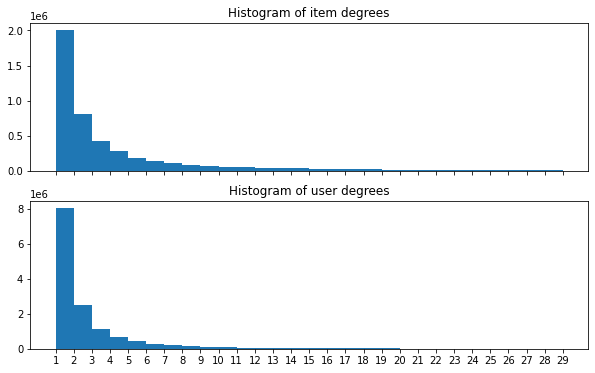

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)
bins = np.arange(1, 30)

ax1.hist(graph.item_idx[:,1], bins=bins)
ax1.set_title("Histogram of item degrees")

ax2.hist(graph.user_idx[:,1], bins=bins)
ax2.set_title("Histogram of user degrees")

ax2.set_xticks(bins);